# Бизнес показатели для развлекательного приложения

В привлечение пользователей развлекательного приложения вкладывались деньги, но бизнес несет убытки. Нужно разобраться в причинах этой ситуации.

**Описание данных**

Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

- User Id — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Region - страна пользователя

Таблица orders_log_short (информация о заказах):

- User Id — уникальный id пользователя, который сделал заказ
- Event Dt — дата и время покупки
- Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день

Рассмотрю сначала общее поведение пользователей и потом в разрезе различных источников привлечения. Проведу маркетинговое исследование и определю, сколько затрачивалось на рекламу. Рассчитаю бизнес показатели, если они показывают убытки компании, разберу возможные причины даных ситуаций. Сделаю выводы и оставлю рекомендации для отдела маркетинга.

## Изучение данных из файлов

In [1]:
# подключение библиотек, необходимых в работе
import pandas as pd  
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

### Чтение данных из файлов

Так как таблиц с данными несколько, для их чтения напишу функцию

In [2]:
# функция чтения данных из файла
def read_csv(name):
    try:
        df = pd.read_csv(f'{name}.csv') 
    except:
        df = pd.read_csv(f'/datasets/{name}.csv')
    return df

In [3]:
# чтение, сохранение и просмотр файла с данными о визитах
visits = read_csv('visits_info_short')
# чтение, сохранение и просмотр файла с данными о заказах
orders = read_csv('orders_info_short')
# чтение, сохранение и просмотр файла с данными о рекламных затратах
costs = read_csv('costs_info_short')

### Общая информация о данных

In [4]:
#функция для первичного просмотра данных в файлах 
def show_info_and_head(df, table_name):
    title = 'Получение общей информации о данных в таблице ' + table_name
    print(title)
    print('=' * len(title))
    print(df.info())
    print('\nВывод первых пяти строк для ознакомления с данными', table_name)
    display(df.head())

In [5]:
# получение информации о данных в таблице visits
show_info_and_head(visits, 'visits')

Получение общей информации о данных в таблице visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Вывод первых пяти строк для ознакомления с данными visits


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [6]:
# получение информации о данных в таблице orders
show_info_and_head(orders, 'orders')

Получение общей информации о данных в таблице orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Вывод первых пяти строк для ознакомления с данными orders


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [7]:
# получение информации о данных в таблице costs
show_info_and_head(costs, 'costs')

Получение общей информации о данных в таблице costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Вывод первых пяти строк для ознакомления с данными costs


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

Пропусков в данных нет.

Но во всех таблицах названия колонок написаны разным регистром и стилем - приведу все к одному виду: нижнему регистру и записи в стиле snake_case.

Для удобства дальнейшего анализа все столбцы с датами переведу в формат datetime.

## Предобработка данных

### Изменение стиля заголовков

In [8]:
# функция для приведения названий столбцов к стилю snake_case
def rename_columns(df, rename_dict):
    # приведение всех названий к нижнему регистру
    df.columns = df.columns.str.lower()
    # переименование столбцов
    df = df.rename(columns=rename_dict)
    return df               

# переименование столбцов в таблицах
visits = rename_columns(visits, {'user id': 'user_id',
                                 'session start': 'session_start',
                                 'session end' : 'session_end'})
orders = rename_columns(orders, {'user id': 'user_id',
                                 'event dt': 'event_dt'})
costs = rename_columns(costs, {})

# вывод названий столбцов на экран для проверки
print(visits.columns)
print(orders.columns)
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')


Index(['dt', 'channel', 'costs'], dtype='object')

### Изменение типов данных

In [9]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### Поиск дубликатов

Проверю на наличие дубликатов в датафреймах. Столбцы с текстовыми записями дополнительно проверю на неявные дубликаты, чтобы исключить двойные записи.

In [10]:
# функция проверки на наличие явных дубликатов
def search_duplicated(df, table_name):
    print('Число дубликатов в', table_name, ':', df.duplicated().sum())

# вывод количества дубликатов в таблицах    
search_duplicated(visits, 'visits')
search_duplicated(orders, 'orders')
search_duplicated(costs, 'costs')

Число дубликатов в visits : 0
Число дубликатов в orders : 0
Число дубликатов в costs : 0


In [11]:
# проверка на неявные дубликаты 
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())
print(costs['channel'].unique())

['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Дубликатов нет.

**Вывод**

Данные в датафреймах проверены на дубликаты, названия столбцов приведены к общему стилю snake_case, даты - к типу datetime.

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

### Функции для создания пользовательских профилей, для расчета удержания, конверсии, LTV и ROI

Для расчета различных метрик удобнее использовать готовые функции. 
Мне понадобятся функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv().

In [12]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
             {
             'session_start': 'first',
             'channel': 'first',
             'device': 'first',
             'region': 'first',
             }
           )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

In [13]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        # возвращаем таблицы LTV и ROI
        return result, roi
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функции для визуализации удержания, конверсии, LTV и ROI

Так же при исследовании пригодятся функции для визуализации метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi(), с помощью которых можно будет строить графики для анализа.

In [16]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.tight_layout()
    plt.show() 

In [17]:
# функция для построения тепловой карты и кривых конверсии
def conversion_plot(df, name):
    # размер «подложки»
    plt.figure(figsize = (20, 5)) 
    # исключаю размеры когорт
    report = df.drop(columns = ['cohort_size'])
    # в первой ячейке таблицы графиков строю тепловую карту
    sns.heatmap(report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1))  
    plt.title(f'Тепловая карта конверсии по {name}')
    # во второй — кривые конверсии
    report.T.plot(grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2))
    plt.title(f'Кривые конверсии по {name}')
    plt.show() 

In [18]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show() 

Все необходимые для анализа функции созданы, можно исследовать данные.

## Исследовательский анализ данных

Бизнес приложения вложил немало средств в рекламу для привлечение новых пользователей, но тем не менее несет убытки. Чтобы понять причину, для начала создам общую таблицу для всех новых пользователей, то есть  тех, кто зашел в приложение первый раз, ведь именно на них были направлены средства на привлечение (реклама). Это будут профили пользователей. На основе профилей пользователей рассмотрю как привлекались пользователи за весь период, сколько из них было платящих. Как это зависило от канала привлечения или страны и другие вопросы.

### Профили пользователей

Получу профили пользователей, вызвав функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу Procrastinate Pro+

In [19]:
# профили пользователей
profiles = get_profiles(visits, orders, _, costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Теперь для дальнейшего анализа есть профили пользователей, в которых для каждого уникального пользователя установлена дата и время первого посещения приложения, страна, устройство захода и канал привлечения (рекламный источник, который мотивировал пользователя перейти в приложение). Дополнительно сформированы столбцы с датой и месяцем посещения, установлен признак 'payer' платящего пользователя (кто хоть раз что-то купил), а так же рассчитан acquisition_cost - показатель CAC (стоимость привлечения одного клиента) 

Так как меня интересуют  только пользователи впервые посетившие приложение, то ограничу свое исследование самой поздней датой первого посещения. 

Определю самую раннюю и самую позднюю даты первого посещения существующие в пользовательских профилях. Самая поздняя дата будет моментом анализа.

В бизнес-плане компании заложено, что пользователи должны окупаться в течении двух недель, поэтому буду рассматривать удержание пользователей с учетом данного времени. Задам горизонт анализа - 14 дней.

In [20]:
min_analysis_date = profiles['dt'].min() #самая ранняя дата первого посещения
observation_date = profiles['dt'].max() # самая поздняя дата первого посещения
print(f'Минимальная дата привлечения пользователей {min_analysis_date}') 
print(f'Максимальная дата привлечения пользователей {observation_date}')

# горизонт анализа 14 дней
horizon_days = 14 
# максимально возможная для такого горизонта дата привлечения (момент-горизонт) 
max_analysis_date = observation_date - timedelta(days=horizon_days -1)  
print(f'Максимально возможная дата привлечения пользователей с учетом горизонта {max_analysis_date}')

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27
Максимально возможная дата привлечения пользователей с учетом горизонта 2019-10-14


Данные для анализа даны в период с мая 2019 года по октябрь 2019 года. Достаточно большой промежуток, чтобы понять что же произошло в компании.

### Общий анализ пользовательских профилей 

Рассмотрю сколько всего пользователей было привлечено в каждый из дней. 

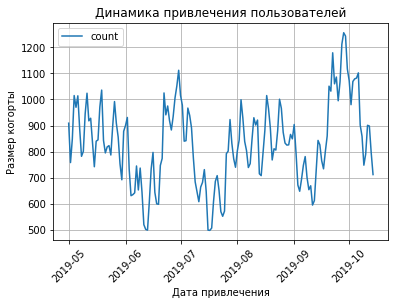

count    830
dtype: int64


In [21]:
# сколько всего пользователей было привлечено в каждый из дней 
# до максимально возможной даты: от min_analysis_date до max_analysis_date
report = (
     # отбор тех, кто был от первого посещения и до максимальной даты
     profiles.query('(dt <= @max_analysis_date) & (dt>=@min_analysis_date)')  
    .groupby('dt')  # группирую по дате
    .agg({'user_id':'nunique'})  # кол-во уникальных значений id пользователя
    .rename(columns={'user_id':'count'}) 
)
# построение графика
report.plot(grid=True)  
plt.title('Динамика привлечения пользователей')  # название графика
plt.xlabel('Дата привлечения')  # название оси X
plt.xticks(rotation=45)  # угол наклона подписей на оси X
plt.ylabel('Размер когорты')   # название оси Y
plt.show()
# среднее количество привлеченных пользователей
mean_daily_cohort_size = report.mean() 
print(mean_daily_cohort_size.astype(int))


В среднем за весь исследуемый период каждый день привлекалось 830 пользователей. При этом в середине месяцев их количество падало, 2 более стабильных периода: с мая по июнь и с августа по сентябрь. Правда к октябрю количество привлекаемых пользователей все-таки выросло. Возможно влияние сезонности, так же может быть внедрение в начале месяца улучшений или обновлений в приложение.

Посмотрю насколько долго оставались пользователи в компании. Построю таблицу удержания и график удержания пользователей. Для этого  функции get_retention(), передам пользовательские профили, сессии, момент анализа данных. 

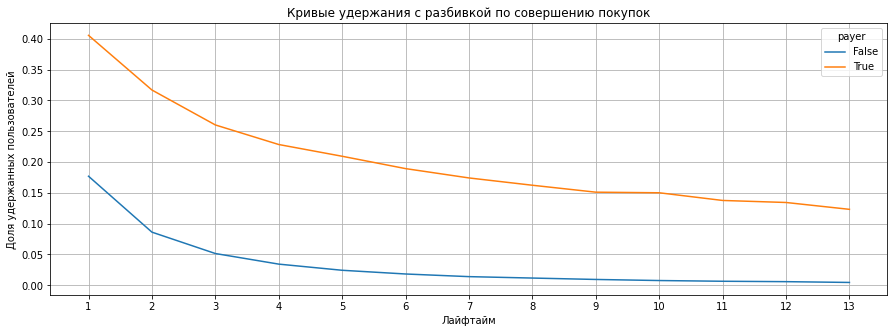

In [22]:
retention_raw, retention, retention_in_time = get_retention(profiles, visits, 
                                     observation_date, horizon_days)
# кривые удержания
report = retention.drop(columns = ['cohort_size', 0])
report.T.plot(
    grid=True,  
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
# название осей 
plt.xlabel('Лайфтайм')  
plt.ylabel('Доля удержанных пользователей')
# название графика
plt.title('Кривые удержания с разбивкой по совершению покупок')  
plt.show()


Удержание пользователей к концу второй недели падает примерно в 2 раза, выше удерживаются платящие пользователи, что вполне логично. 

### Анализ пользовательских профилей с разбивкой по странам, устройствам и каналам привлечения

Посмотрю, из каких стран, с каких устройств и каналов привлечения приходят посетители. А так же какая доля платящих пользователей приходится на каждый из этих параметров.

Напишу функцию для вывода таблицы по каждому из этих параметров, для этого сгруппирую профили по рассматриваемому параметру, посчитаю количество уникальных ID функцией nunique() и долю платящих пользователей, отсортирую вывод по убыванию доли платящих пользователей.

Долю платящих пользователей легко рассчитать по признаку в столбце payer таблицы profiles, который принимает значение True, если идентификатор пользователя есть среди покупателей, и значение False в ином случае. 

Добавлю и функцию для визуализации динамики привлечения новых пользователей.

In [23]:
# функция для вывода количества уникальных пользователей
# и доли платящих пользователей для каждого анализируемого параметра
def count_unique_users (df, by):
    return (
            profiles.groupby(by)
                    .agg({'user_id': 'nunique', 'payer':'mean'})
                    .rename(columns={'user_id':'count', 'payer':'payer_ratio'})
                    .sort_values(by='payer_ratio', ascending=False)
           )

In [24]:
# функция для построения графика динамики привлечения новых пользователей 
def plot_profiles(df, columns):
    window = 7 # задам окно сглаживания для графиков
    table = df.pivot_table(
                          index='dt',  # даты первых посещений
                          columns=columns,  # источники переходов 
                          values='user_id',  # ID пользователей
                          aggfunc='nunique'  # подсчёт уникальных значений
                          )
    filter_data(table, window).plot(figsize=(15, 5), grid=True)
    plt.title('График динамики привлечения новых пользователей\n Ширина окна сглаживания: {}'.format(window))
    plt.xlabel('Дата привлечения')
    plt.show()

#### Анализ в разрезе стран

Посмотрю с каких стран чаще всего приходят пользователи и какая доля новых посетителей стала покупателями в каждой стране. Для большей наглядности построю графики:

In [25]:
# функция для построения столбчатой диаграммы доли платящих пользователей 
def count_users_plot(df, name):
    df['payer_ratio'].plot(kind='bar', figsize=(10, 5), grid=True,
                           title=f'Доля платящих пользователей для {name}');

In [26]:
#количество уникальных пользователей и доля платящих для каждой страны
count_users_for_region = count_unique_users(profiles, by='region')
count_users_for_region

count  payer_ratio
region                            
United States  100002     0.069019
Germany         14981     0.041119
UK              17575     0.039829
France          17450     0.037994

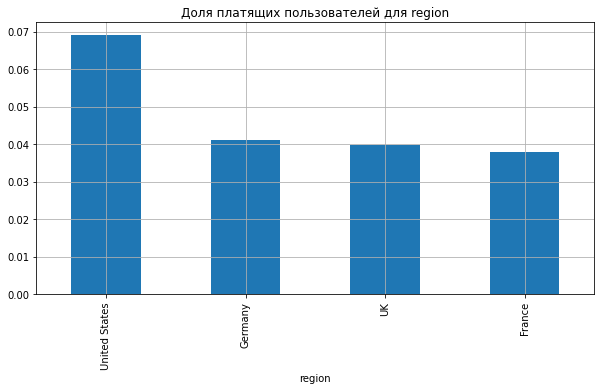

In [27]:
# столбчатая диаграмма доли платящих пользователей для каждой страны
count_users_plot(count_users_for_region, 'region')

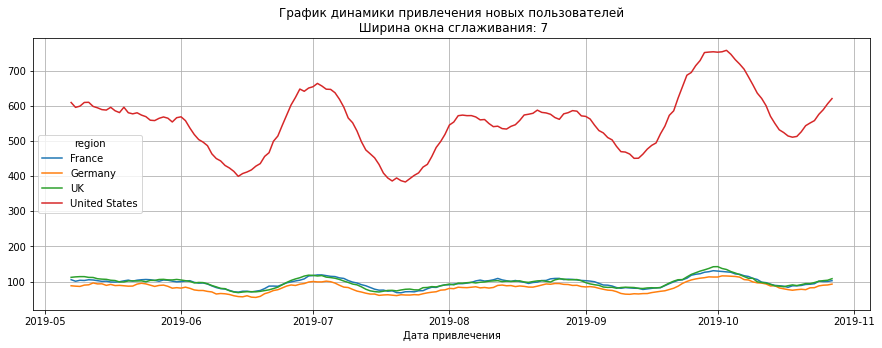

In [28]:
#график динамики привлечения новых пользователей по каждой стране
plot_profiles(profiles, 'region')

**Вывод**

Больше всего приложением пользуются посетители из United States, их количество примерно в 5,5 раз превышает пользователей других стран, при этом количество привлекаемых пользователей по данной стране сильно скачет (примерно от 400 до 750 новых пользователей в день).

Другие страны более стабильны и количество привлекаемых ими пользователей не опускается ниже определённого уровня (примерно не менее 50 пользователей за день).

Из полученной таблице и диаграмме тоже хорошо видно, что большая доля платящих пользователей приходит из США. 

#### Анализ по устройствам захода пользователей

Определю, сколько пользователей заходили на сайт с каждого устройства. И с каких устройств чаще всего заходят платящие пользователи.

In [29]:
#количество уникальных пользователей и доля платящих по каждому устройству
count_users_for_device = count_unique_users(profiles, by='device')
count_users_for_device

count  payer_ratio
device                     
Mac      30042     0.063644
iPhone   54479     0.062079
Android  35032     0.058518
PC       30455     0.050468

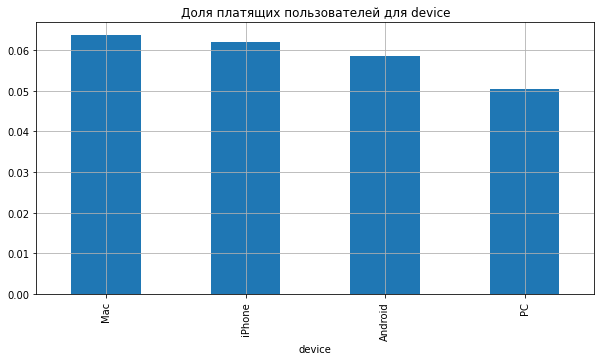

In [30]:
# столбчатая диаграмма доли платящих пользователей по каждому устройству
count_users_plot(count_users_for_device, 'device')

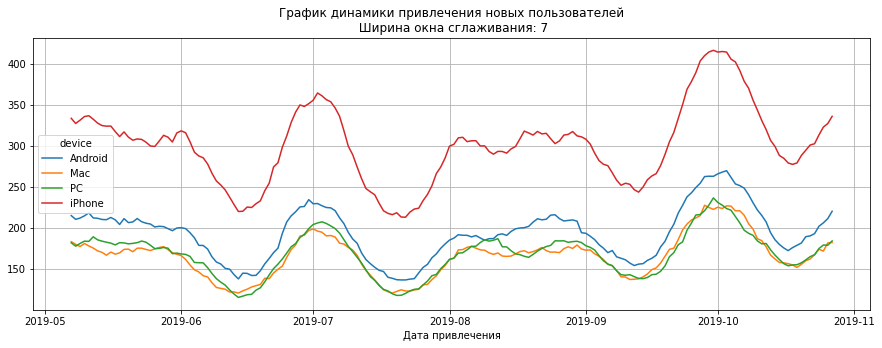

In [31]:
#график динамики привлечения новых пользователей по каждому устройству
plot_profiles(profiles, 'device')

**Вывод**

Чаще всего пользователи используют iPhone для захода, чуть меньше Android и реже заходят с компьютеров. При этом доля платящих пользователей среди всех устройств не сильно отличается, хотя и лидируют Mac и iPhone. Учитывая огромное количество заходящих пользователей со стран США, вполне объяснимо, что лидируют iPhone и Mac по количеству заходов.

#### Анализ по каналам привлечения пользователей

Расмотрю рекламные источники привлечения, по каким каналам пришло больше всего платящих пользователей:

In [32]:
#количество уникальных пользователей и доля платящих по каждому каналу
count_users_for_channel = count_unique_users(profiles, by='channel')
count_users_for_channel

count  payer_ratio
channel                               
FaceBoom            29144     0.122049
AdNonSense           3880     0.113402
lambdaMediaAds       2149     0.104700
TipTop              19561     0.096007
RocketSuperAds       4448     0.079137
WahooNetBanner       8553     0.052964
YRabbit              4312     0.038265
MediaTornado         4364     0.035747
LeapBob              8553     0.030633
OppleCreativeMedia   8605     0.027077
organic             56439     0.020553

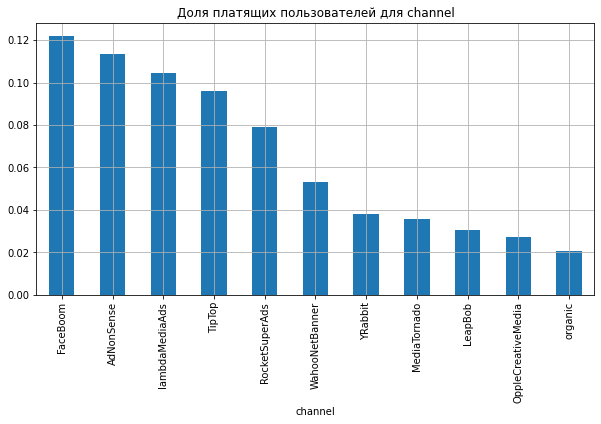

In [33]:
# столбчатая диаграмма доли платящих пользователей по каждому каналу
count_users_plot(count_users_for_channel, 'channel')

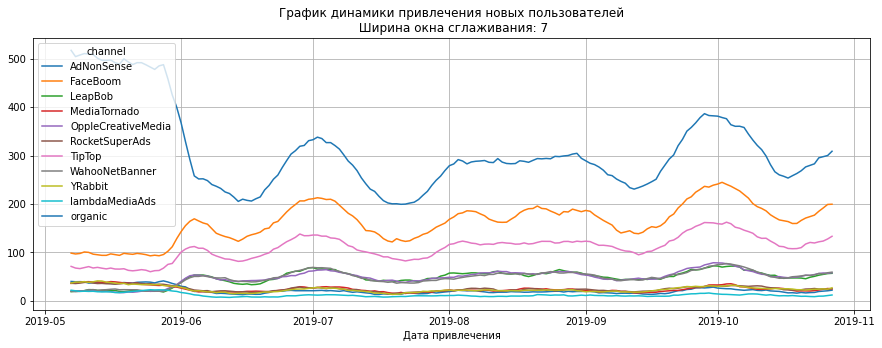

In [34]:
#график динамики привлечения новых пользователей по каждому каналу
plot_profiles(profiles, 'channel')

**Вывод**

Больше приходит пользователей с канала привлечения organic, но платящих среди них меньше всего. 

FaceBoom и TipTop отлично привлекает пользователей, и доля платящих среди них тоже хорошая. При этом примечательно, что такие каналы как AdNonSense и lambdaMediaAds привлекают очень мало клиентов, но при этом платящих среди них даже больше, чем у TipTop (TipTop тут на 4 месте). 

По графику динамики привлечения пользователей в конце мая резкий спад привлеченных пользователей с канала organic. Если мы дальше их будем брать в расчет, это сильно повлияет на показатель CAC, так как пользователей с нулевым CAC станет примерно в два раза меньше. Так же таких пользователей плохо использовать в расчете ROI, так как нет инвестиций.  Поэтому пользователей с этого  канала я удалю из расчетов для дальейшего анализа:

In [35]:
# удаление пользователей канала organic
profiles = profiles.query('channel != "organic"')

### Подведение итога

Больше всего пользователей приходит из США, с источников organic, FaceBoom и TipTop.

Чаще всего используется iPhone для захода, чуть меньше Android и реже заходят с компьютеров.

Большая доля платящих пользователей приходит из США, с каналов FaceBoom, AdNonSense, lambdaMediaAds и TipTop.
Канал organic привлекает много новых пользователей, но они не готовы платить. А вот доля платящих пользователей среди всех устройств не сильно отличается.

## Маркетинговый анализ

### Общие расходы на маркетинг

Посчитаю общую сумму расходов на маркетинг и посмотрю как траты распределены по источникам. Построю график изменения метрик во времени.

In [36]:
# всего затрачено на привлечение пользователей
print(f'Общая сумма расходов на маркетинг {int(costs["costs"].sum())}')

Общая сумма расходов на маркетинг 105497


In [37]:
# общая сумма расходов на маркетинг, распределеная по источникам
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

Примечательно, что больше всего денег (больше половины от всех затрат) тратится на рекламу на канале TipTop, но при этом новых пользователей оттуда приходит  меньше, чем с FaceBoom. Меньше всега затрат на рекламу на канале MediaTornado и YRabbit.

### Динамика затрат на привлечение пользователей

Рассмотрю общую динамику затрат по различным каналам привлечения пользователей: 

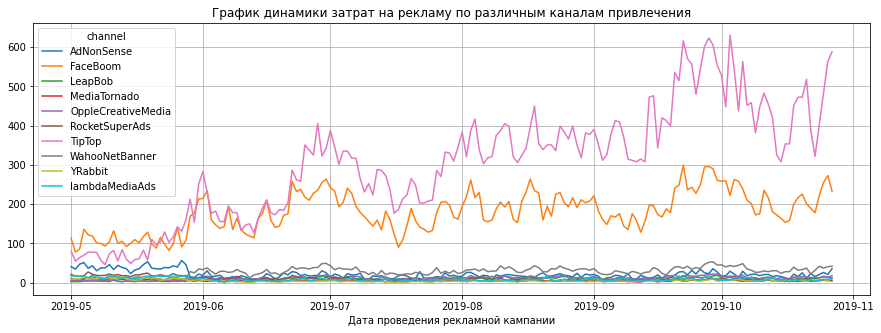

In [38]:
costs.pivot_table(
                  index='dt',  # даты вложений в рекламу
                  columns='channel',  # источники переходов 
                  values='costs',  # затраты на рекламный источник
                  aggfunc='sum'  # подсчёт суммы затрат
                  ).plot(figsize=(15, 5), grid=True)
plt.title('График динамики затрат на рекламу по различным каналам привлечения')
plt.xlabel('Дата проведения рекламной кампании')
plt.show()

Затраты на рекламу в каналах TipTop и FaceBoom увеличивались со временем (увеличение рекламного бюджета?), больше всего было затрат по каналу TipTop, примерно с конца мая. По графику можно сказать, что больше всего было вложений в рекламу на этих каналах в октябре 2019 г. Остальные затраты были практически постоянны на протяжении всего исследуемого периода. 

### Привлечение одного пользователя из каждого источника

Посмотрю, сколько в среднем стоило привлечение одного пользователя из каждого источника. В таблице profiles столбец acquisition_cost хранит информацию со стоимостью привлечения каждого посетителя сайта (в маркетинге этот показатель называют  CAC (Customer Acquisition Cost) - это инвестиции в маркетинг. Чтобы вычислить CAC нужно разделить рекламные расходы на количество новых пользователей).

Рассчитаю средний CAC на одного пользователя для всего проекта и для каждого источника трафика. 

In [39]:
# средний CAC на одного пользователя для всего проекта
print(f'Средний CAC на одного пользователя для всего проекта {profiles["acquisition_cost"].mean()}')

Средний CAC на одного пользователя для всего проекта 1.1274813239427588


В целом затраты на маркетинг не окупаются (средний CAC выше 1). Посмотрим на каких каналах этот показатель так же выше 1:

In [40]:
# средние затраты на привлечение одного пользователя из каждого источника
(profiles.groupby('channel')
         .agg({'acquisition_cost':'mean'})
         .sort_values(by='acquisition_cost', ascending=False))

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

Выше среднего стоят привлечения для пользователей из TipTop, приблизительно раза в 2,5. Очень дорогой канал, только вот доля платящих пользователей у него меньше, чем у того же FaceBoom или AdNonSense и lambdaMediaAds. Есть что рассмотреть далее более подробно.

Выясню, как меняется стоимость привлечения для каждого источника в динамике. Для этого построю сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построю по ней график истории изменений.

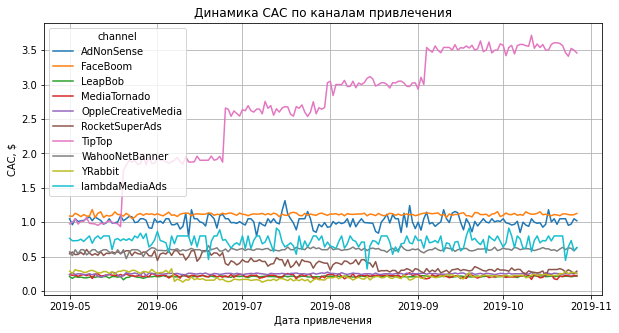

In [41]:
# график истории изменений CAC по каналам привлечения
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Если сравнивать два графика затрат (общих по каналам и на одного пользователя), то можно сделать вывод, что затраты на привлечение FaceBoom растут совместно с количеством привлеченных клиентов, а вот с TipTop ситуация иная, и даже затраты на одного пользователя очень сильно выросли, что может говорить об увеличении рекламного бюджета на этом канале.

Посмотрю как обстоят дела с затратами на привлечение одного пользователя по странам

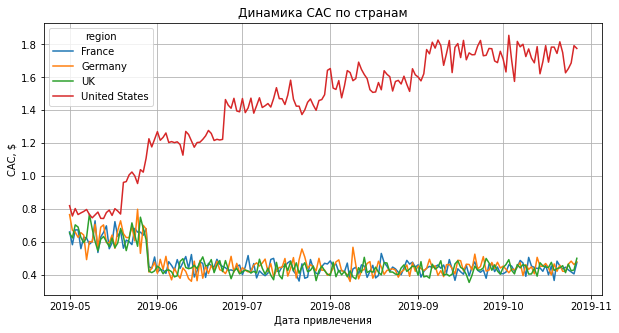

In [42]:
# график истории изменений CAC по странам
profiles.pivot_table(
    index='dt', columns='region', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по странам')
plt.show()

Стоимость привлечения одного пользователя для США тоже сильно увеличилась, при этом одновременно снизилась по другим странам. Выглядит вполне логично, ведь они отлично конвертируются (доля платящих пользователей среди них выше, чем у пользователей из других стран). Вопрос приносят ли пользователи данной страны достаточно денег, чтобы покрыть такие затраты?.

Затраты на привлечение одного пользователя по устройствам:

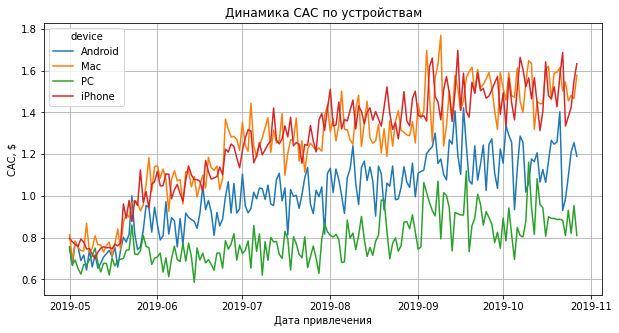

In [43]:
# строю график истории изменений CAC по устройствам
profiles.pivot_table(
    index='dt', columns='device', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по устройствам')
plt.show()

Тоже видно увеличение стоимости привлечения одного клиента, особенно для устройств iPhone и Mac.

### Вывод

Стоимость привлечения одного пользователя растет, особенно сильно выросли затраты на канале TipTop, а так же для пользователей США и для устройств iPhone и Mac. 

По каналу TipTop затраты на одного пользователя очень сильно росли, при этом количество пользователей у них не сильно менялось (даже доля платящих пользователей у TipTop меньше, чем у того же FaceBoom или AdNonSense и lambdaMediaAds), все это может говорить об увеличении или удорожании рекламного бюджета на этом канале.

Меньше всего затрат на рекламу на канале MediaTornado и YRabbit.

Предварительно можно сказать, что одна из причин убытков компании кроется в том, что с середины мая в канал TipTop увеличились вливания, но при этом данный канал не настолько хорошо привлекал платящих клиентов.

Но прежде чем делать окончательный вывод, рассчитаю бизнес-показатели и оценю сколько приносили такие пользователи средств и сколько на них тратилось при этом. Определю окупалась ли реклама.

## Бизнес-показатели

### Анализ окупаемости рекламы

#### Анализ общей окупаемости рекламы

Оценю общую ситуацию — посмотрю на окупаемость рекламы. Рассчитаю и визуализирую LTV (Lifetime Value - общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок) и ROI (Return On Investment - окупаемость инвестиций). Воспользуюсь функциями get_ltv() и plot_ltv_roi().

Все расчеты так же проведу в горизонте анализа 14 дней. Так как анализ бизнес-показателей разумнее проводить за определённый срок — для компании, согласно бизнес-плану, важно, чтобы в течении 14 дней после регистрации пользователи окупились.

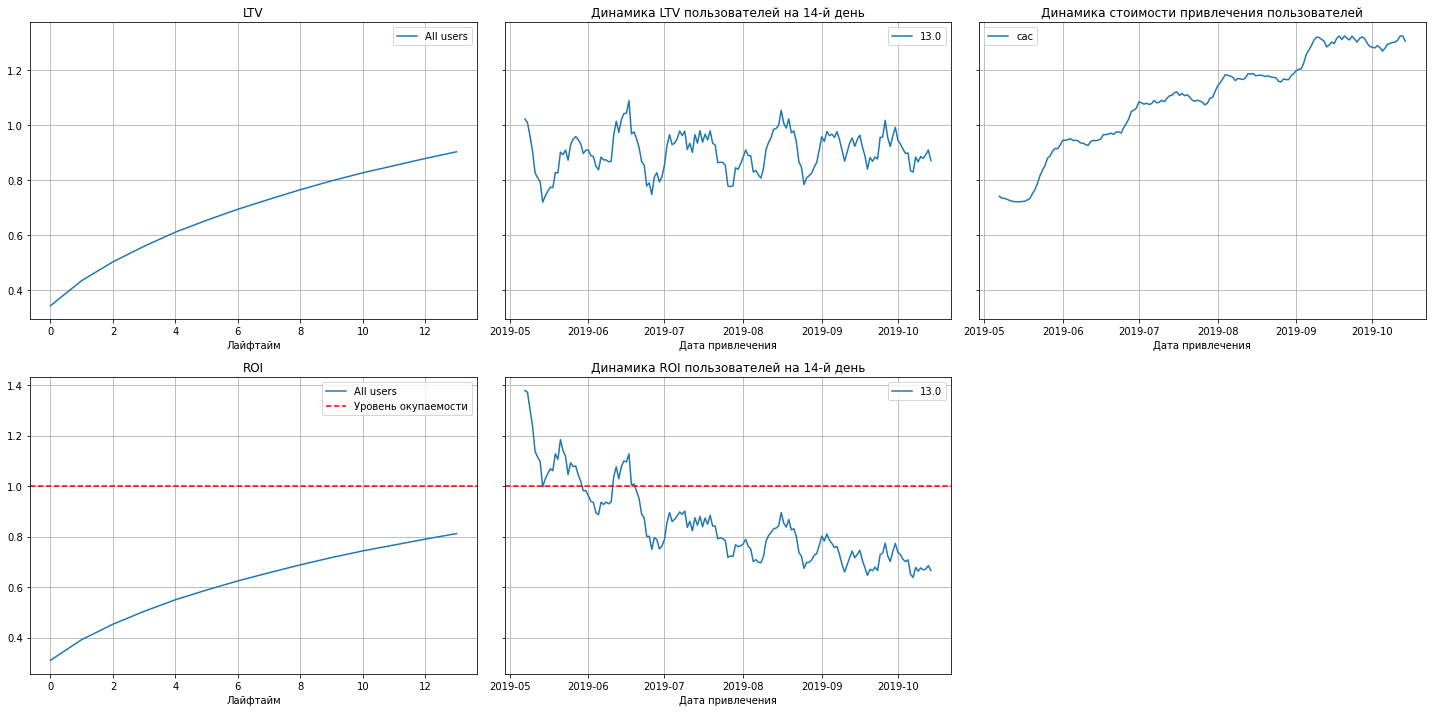

In [44]:
# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                                     profiles, orders, observation_date, horizon_days)
# графики LTV, ROI и их динамики на 14й день
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


По графикам можно сделать выводы:

-	Реклама не окупается совсем. ROI в конце второй недели еле дотягивается до 80%.
-	CAC растет с середины мая. Снова сказывается увеличении рекламного бюджета? По каким каналам, странам или устройствам -     необходимо выяснить.
-	LTV более менее стабилен. Значит, дело не в ухудшении качества пользователей.
-	На графике динамики ROI идет падение окупаемости клиентов примерно с июня, что снова указывает на увеличением затрат на рекламу в этом периоде.

Чтобы разобраться в причинах падения окупаемости рекламы, рассмотрю все доступные характеристики пользователей — страну, источник и устройство первого посещения.

#### Анализ окупаемости рекламы с разбивкой по каналу привлечения

Проанализирую окупаемость рекламы с разбивкой по рекламным каналам: передам параметру dimensions столбец channel.
Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.
Органических пользователей из анализа я убрала ранее, так как в них нет инвестиций и при расчетах ROI они будут искажать результат.

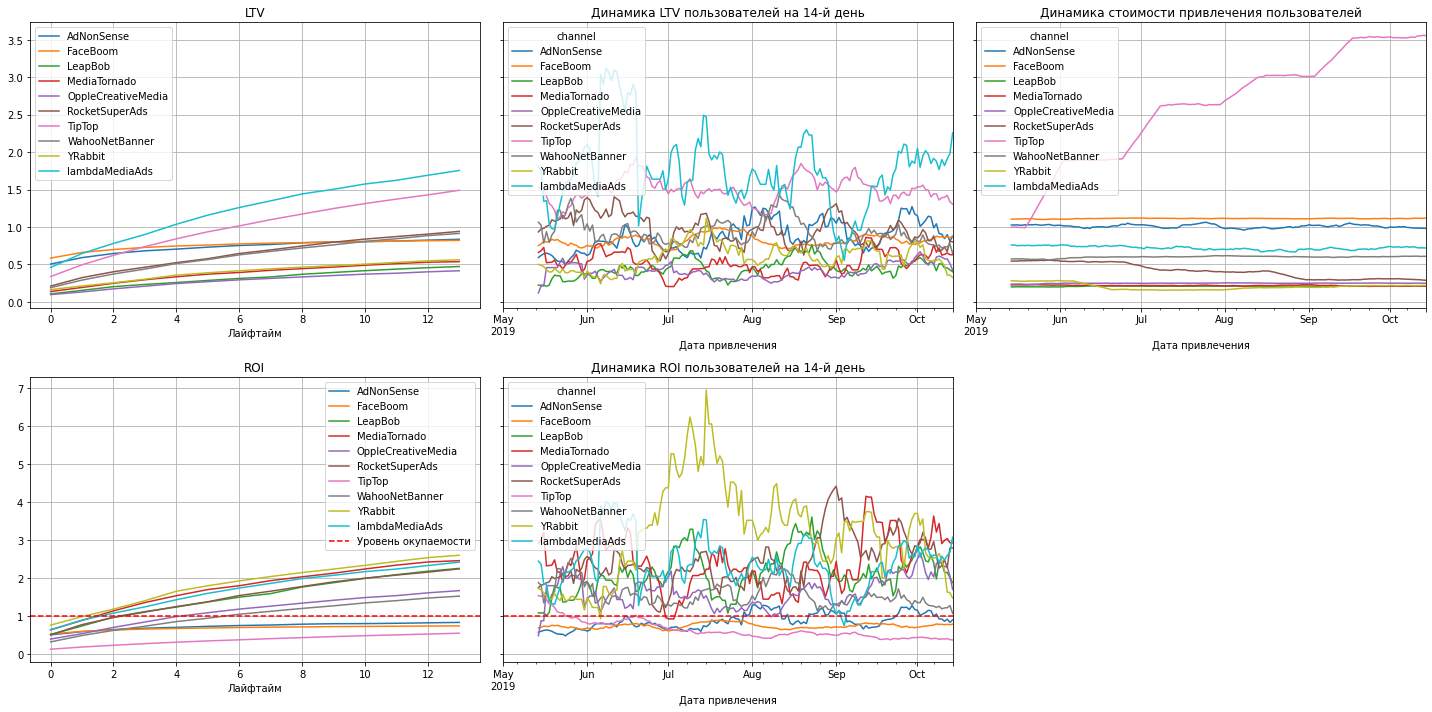

In [45]:
# окупаемость с разбивкой по каналу привлечения пользователей
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 


По графикам можно сделать выводы:

-	Реклама полностью не окупается в каналах TipTop, FaceBoom и AdNonSense. У остальных начинает окупаться         примерно со 2-4го дня привлечения пользователей
-	Стоимость привлечения так же растет на канале TipTop и очень сильно, у других более стабильна и одинакова.
-	LTV более менее постоянен для каждого канала.
-	Лучше всего окупается реклама по каналам: YRabbit (в июле даже большой скачок окупаемости), MediaTornado,     lambdaMediaAds. Связано это с тем, что при примерно одинаковой прибыли от пользователей с этих каналов, затраты на рекламу там намного меньше остальных.


#### Анализ окупаемости рекламы с разбивкой по странам

Теперь проверю окупаемость рекламы с разбивкой по странам. 

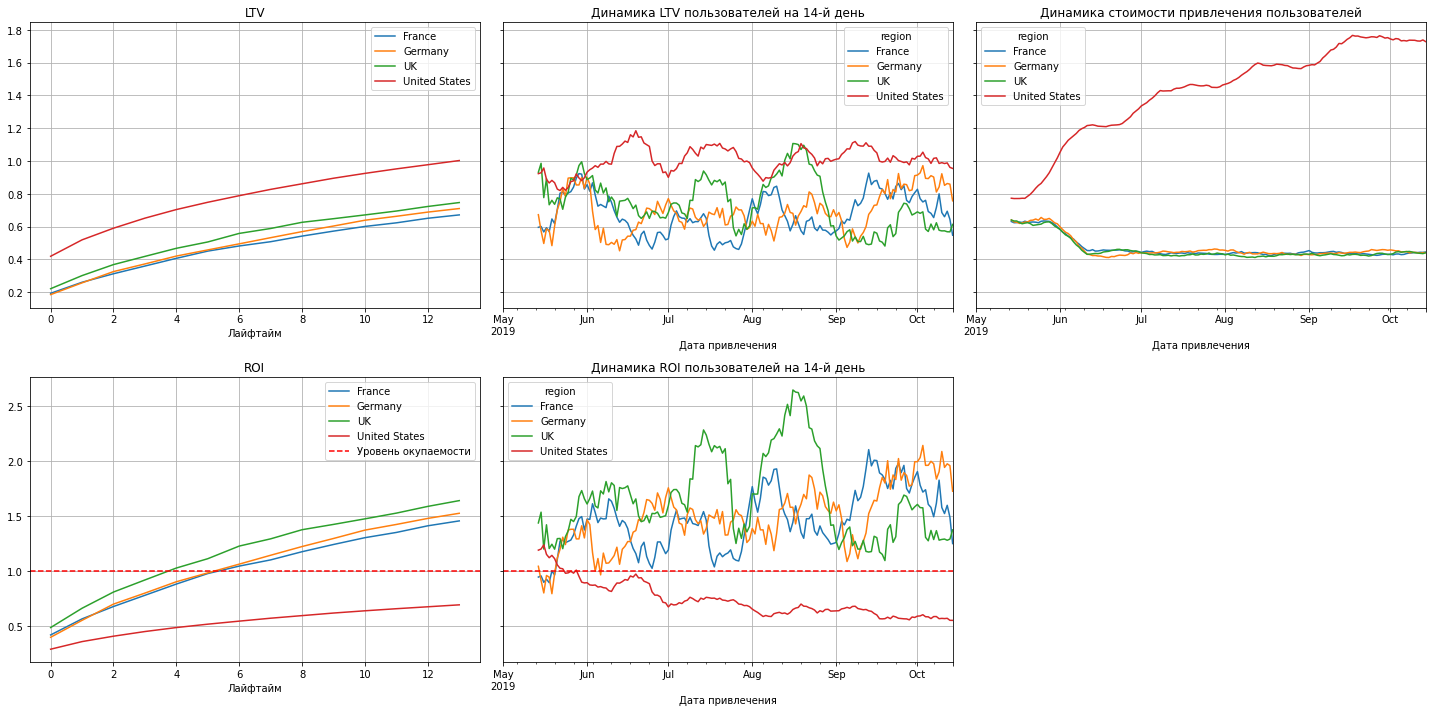

In [46]:
# окупаемость с разбивкой по странам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 


С разбивкой по странам по графикам можно сказать:
-	Реклама совсем не окупается для США.
-	Стоимость привлечения для США с конца мая резко увеличивается, при этом уменьшается у пользователей других стран.
-	LTV стабилен и тут США даже приносит больше прибыли, чем другие. Но судя по всему или недостаточно, чтобы окупились затраты или есть иная проблема.
-	Все остальные страны начинают окупаться примерно после 5го дня привлечения пользователей. Лучше всего и быстре (с 4го дня) окупается Великобритания.

США приносят неплохую прибыть в отличии от остальных стран, но при этом по ней наблюдается повышение расходов на рекламу с середины мая. Посмотрю, какие каналы привлечения вызывают такие затраты и, возможно, как следствие являются причиной неокупаемости рекламы для США. Построю графики для каналов привлечения только по США:

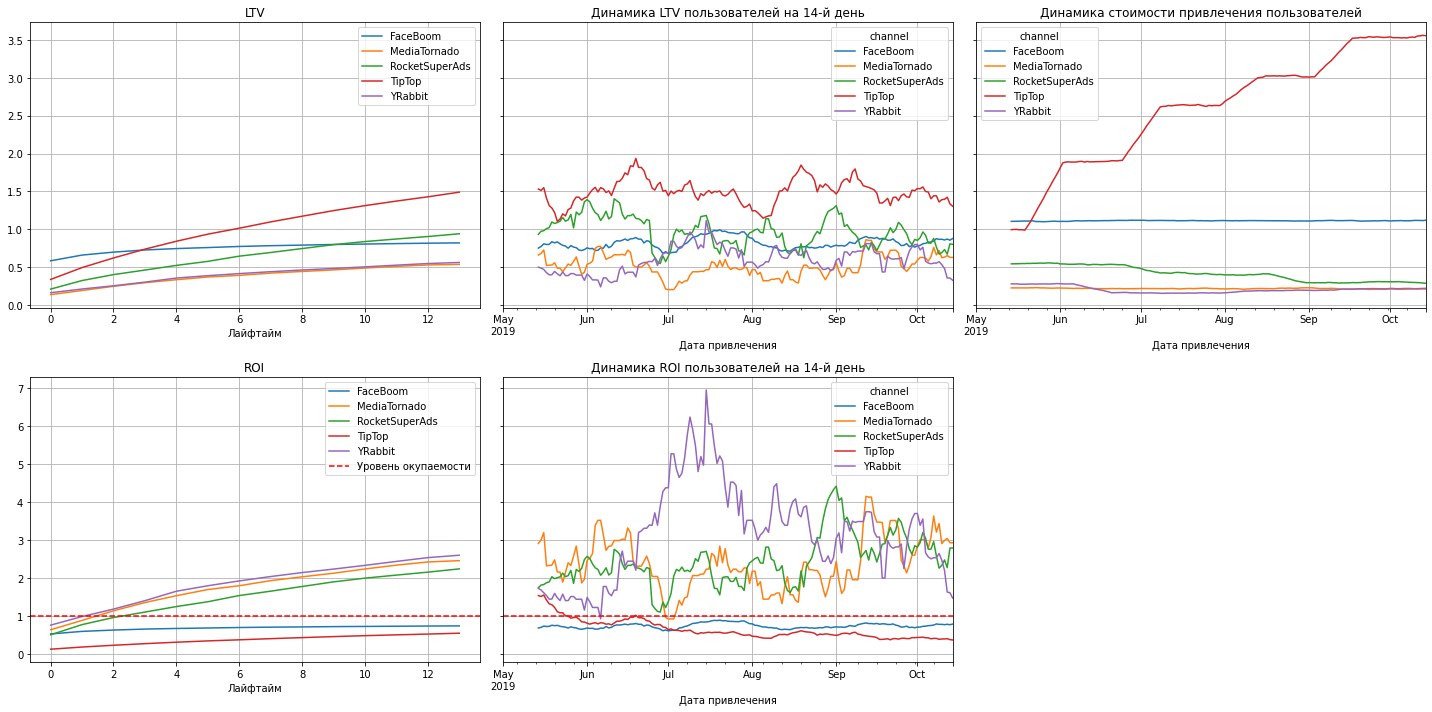

In [47]:
# срез данных по стране США
profiles_for_US = profiles.query('region == "United States"')

# окупаемость с разбивкой по каналу привлечения пользователей США 
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_US, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 

Неокупаются два канала TipTop, на который затрачивается слишком много средств, и FaceBoom. Но стал заметнее виден канал RocketSuperAds, который к 10 дню привлечения стал приносить даже больше прибыли, чем FaceBoom. И окупается он, начиная со второго дня привлечения пользователей. Стоит обратить на него внимание. Хорошо окупаются YRabbit и MediaTornado, но тут скорее всего за счет малых затрат на них, прибыли они приносят меньше всех. 

Интересно посмотреть, что же тогда со странами ЕС в разбивке по каналам привлечения:

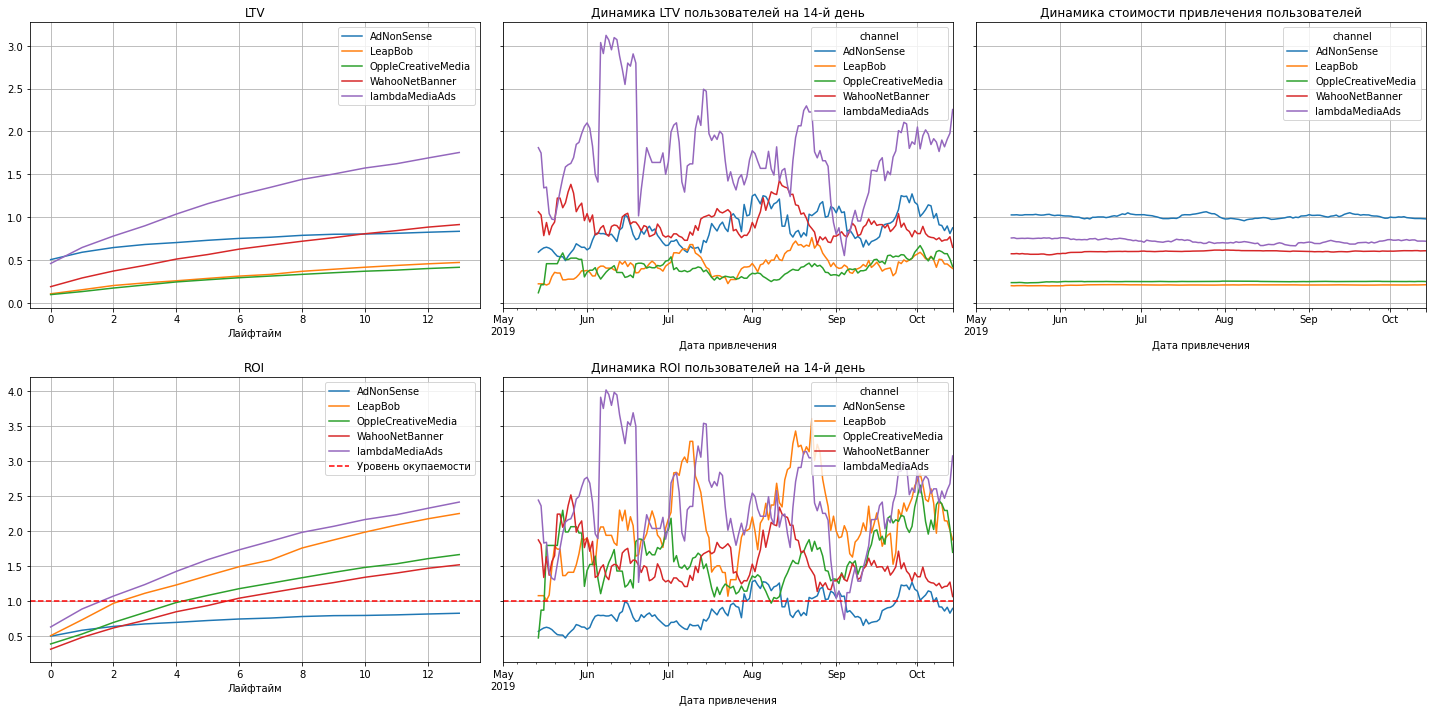

In [48]:
# срез данных по странам ЕС
profiles_for_EU = profiles.query('region != "United States"')

# окупаемость с разбивкой по каналу привлечения пользователей ЕС 
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_EU, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 

Каналы TipTop и FaceBoom в Европе и не используются, а потому тут практически по всем каналам, кроме AdNonSense, хорошая окупаемость. Самую высокую прибыль и лучше окупаемость показывает канал привлечения пользователей lambdaMediaAds.

Посмотрю окупаемость по устройствам:

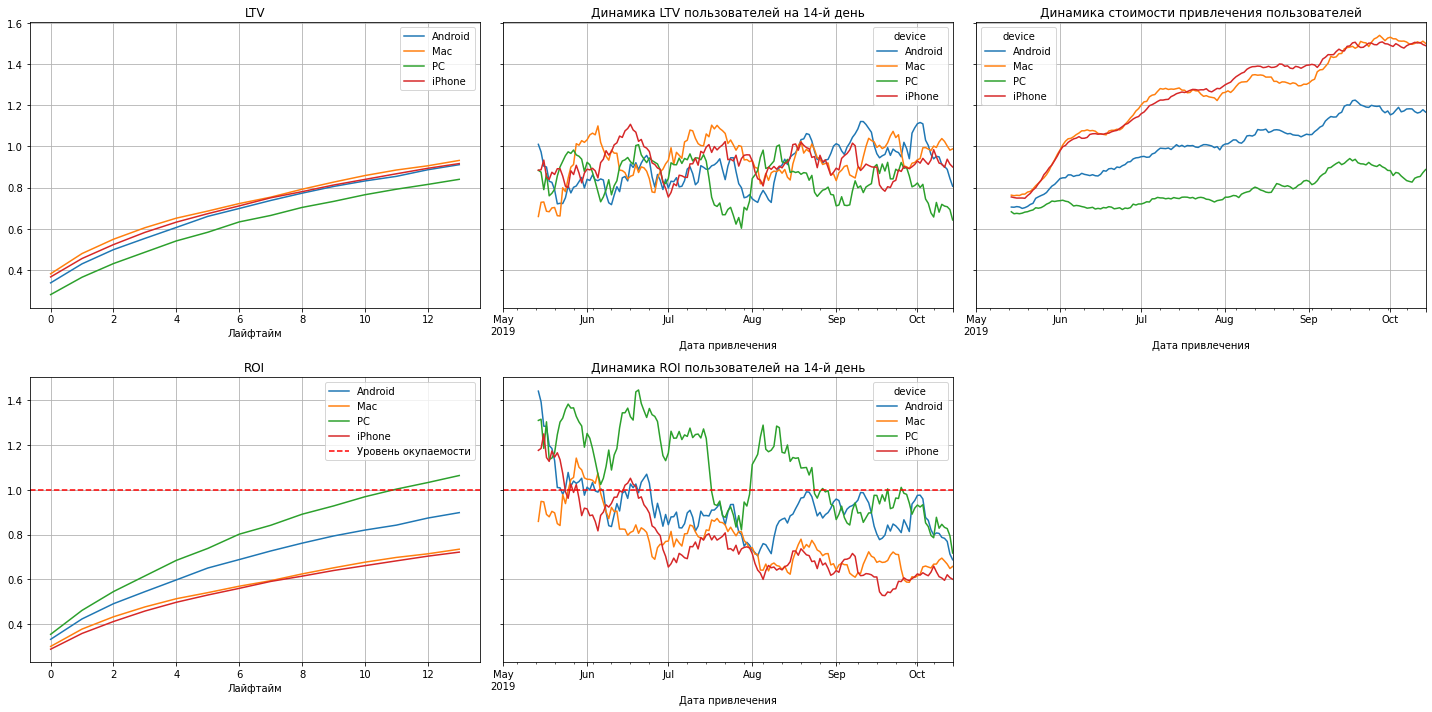

In [49]:
#окупаемость с разбивкой по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи iPhone и Mac также стабильно не окупаются, чуть лучше у Android, но все равно даже к концу второй недели ROI дотягивает только до 90%. И только на PC к 11му дню ROI стал более 100%. При этом по всем устройствам стоимость привлечения новых пользователей увеличивается с конца мая, у iPhone и Mac примерно в 2,5 раза.

Очень много затрачивается на рекламу для устройств iPhone и Mac, при этом денег они приносят почти наравне с другими.

Посмотрю не из-за расходов ли по каналам TipTop и FaceBoom и тут:

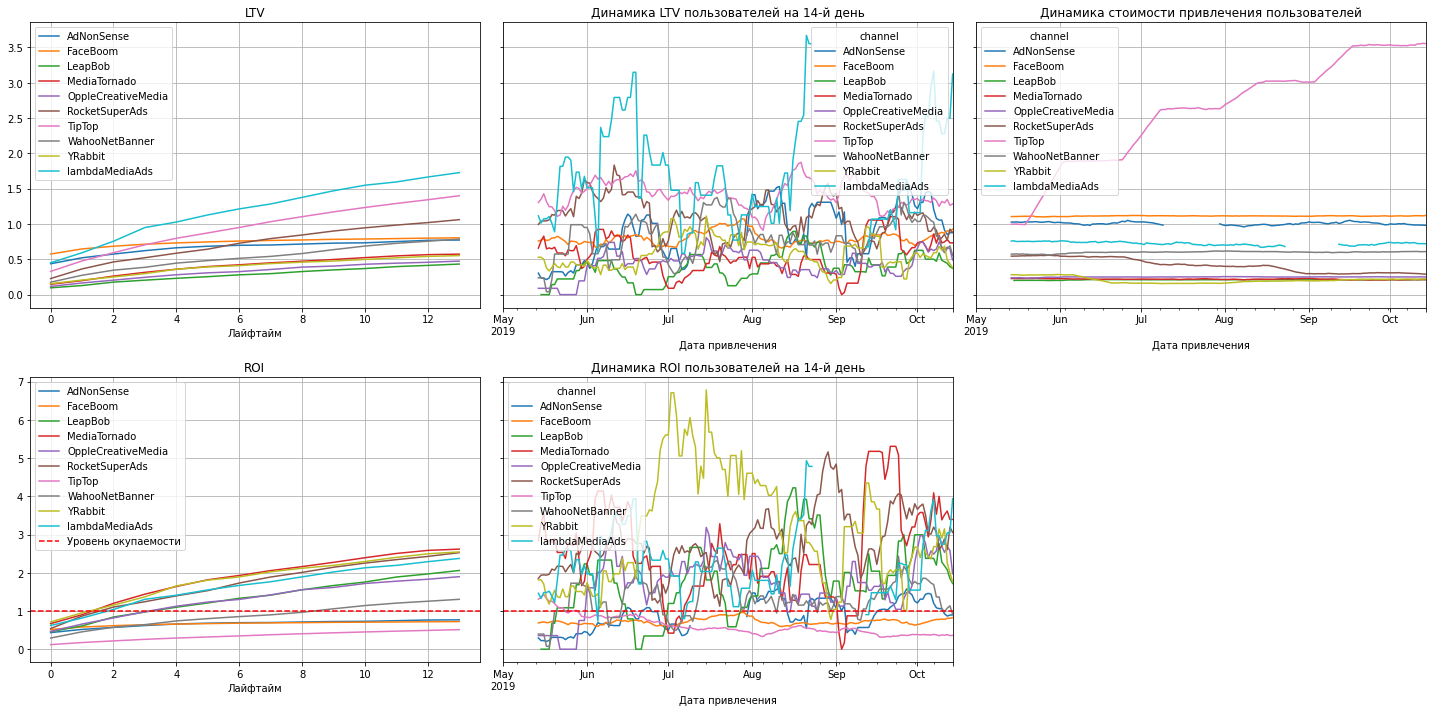

In [50]:
# срез данных по iPhone и Mac
profiles_for_device = profiles.query('device == "Mac" or device == "iPhone"')

# окупаемость с разбивкой по каналу привлечения пользователей США 
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_for_device, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 

Все тот же дорогой канал TipTop, в который затратили слишком много денег. Теперь понятно почему на предыдущих графиках росла стоимость привлечения пользователей, заходящих с этих устройств.

#### Подведение итога

Реклама не окупается совсем. ROI в конце второй недели еле дотягивается до 80%.

В разбивке по каналам  - полностью не окупается в каналах TipTop, FaceBoom и AdNonSense. На остальных каналах начинает окупаться примерно со 2-4го дня привлечения пользователей.  Лучше всего окупается реклама по каналам: YRabbit, MediaTornado, lambdaMediaAds. 

Так же не окупается у пользователей из США и iPhone и Mac. 

По остальным странам реклама окупается примерно на 5й день привлечения пользователей.

LTV у всех более менее стабилен. Значит, дело не в ухудшении качества пользователей.

Сильный рост CAC с середины мая, и падение окупаемости клиентов на графике динамики ROI примерно с июня, явно говорит об увеличении рекламного бюджета.

Много затрачивается на рекламу для устройств iPhone и Mac, при этом денег они приносят почти наравне с другими.

Примечательно, что самые неокупаемые каналы TipTop и FaceBoom ориентированы только на пользователей США, и именно для них они являются самыми проигрышными для бизнеса. Зато для тех же пользователей из США есть вполне неплохой по окупаемости канал RocketSuperAds.

В странах Европы есть канал привлечения пользователей lambdaMediaAds, который дает самые лучшие показатели по прибыли и окупаемости.

### Исследование причин низкой окупаемости

Узнаем, в чём причина низкой окупаемости: в низкой конверсии или низком удержании.
Посчитаю и визуализирую конверсию, вызвав функции get_conversion() и conversion_plot().
Визуалирую эти данные с помощью функции расчета конверсии get_conversion(). Дополнительно создам функцию для построения тепловой карты и кривых конверсии.

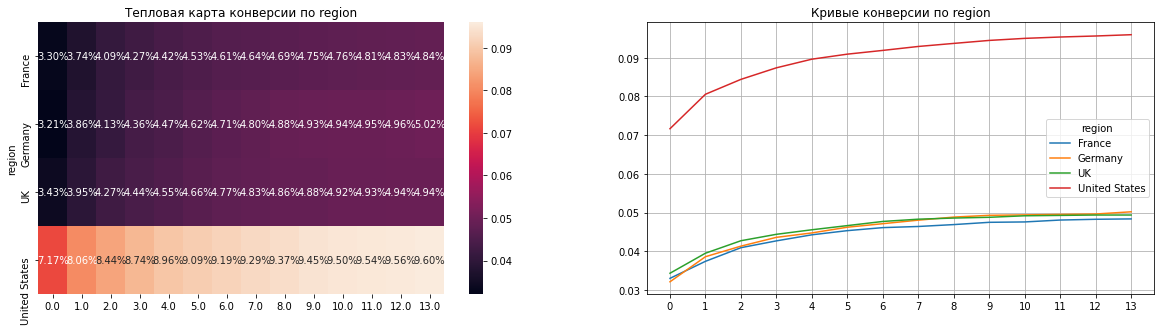

In [51]:
# получаю сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# построение тепловой карты и кривых конверсии по странам    
conversion_plot(conversion, 'region')

Пользователи США отлично конвертируются по сравнению с другими, и конверсия для всех растет. Пока ничего отрицательного не видно. Посмотрю насколько хорошо удерживаются пользователи из разных стран, воспользуюсь функцией plot_retention() для визуалиации удержания и функцией get_retention() для его расчета.

In [52]:
# расчет удержания для пользователей разных стран
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])

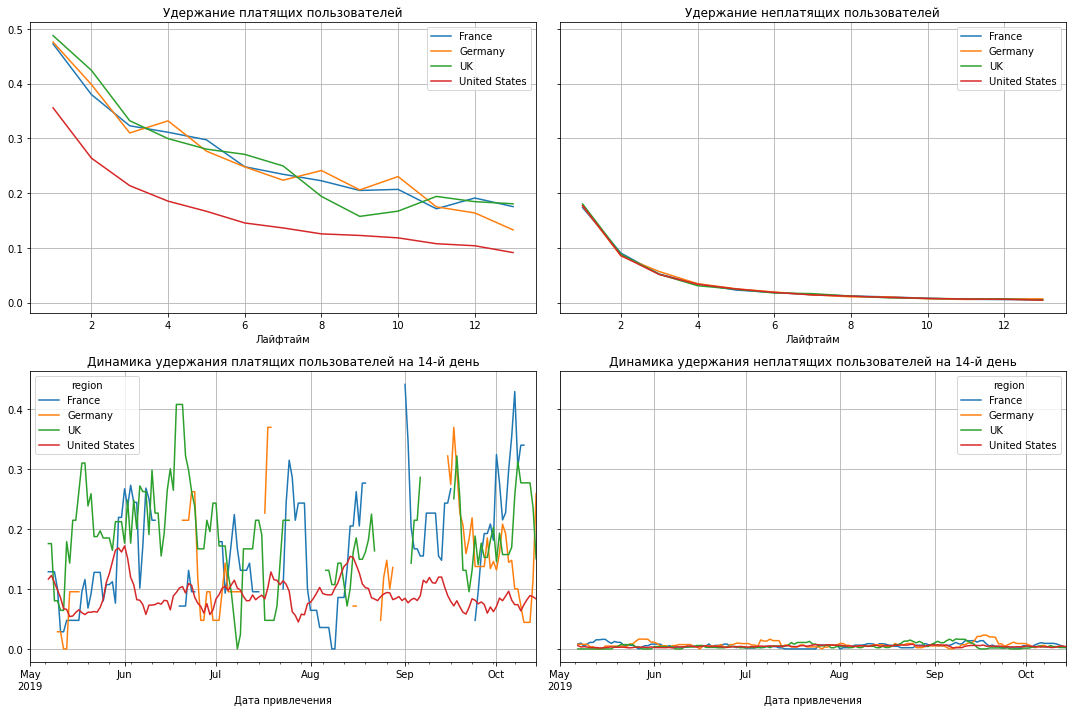

In [53]:
# построение графика удержания платящих и не платящих пользователей
plot_retention(retention, retention_history, horizon_days, window=7)

А вот удерживаются пользователи США хуже всего, при это в покупатели они конвертируютя лучше всех. Проблема в удержании?. Удержание у всех стран снижается со временем.

Рассмотрю те же показатели в разрезе устройств:

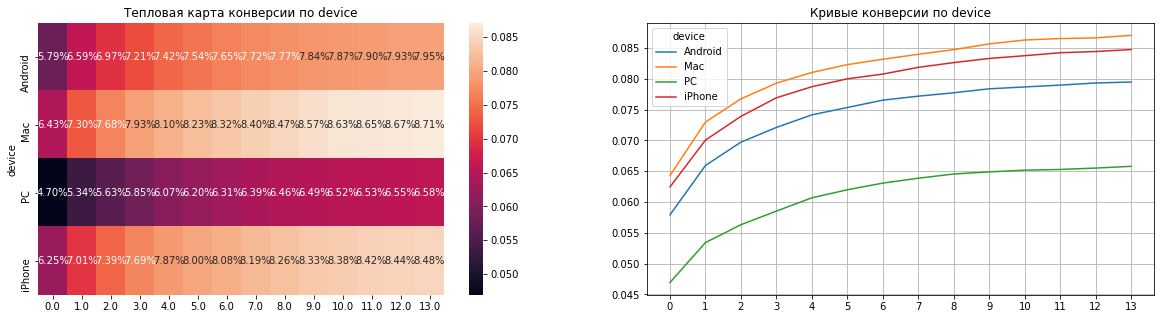

In [54]:
# получаю сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
# построение тепловой карты и кривых конверсии по устройствам    
conversion_plot(conversion, 'device')

Хуже всех конвертируются пользователи, использующие PC, лучше Mac и iPhone. При этом они были единственные, кто хотя бы к концу второй недели вышел на окупаемость.

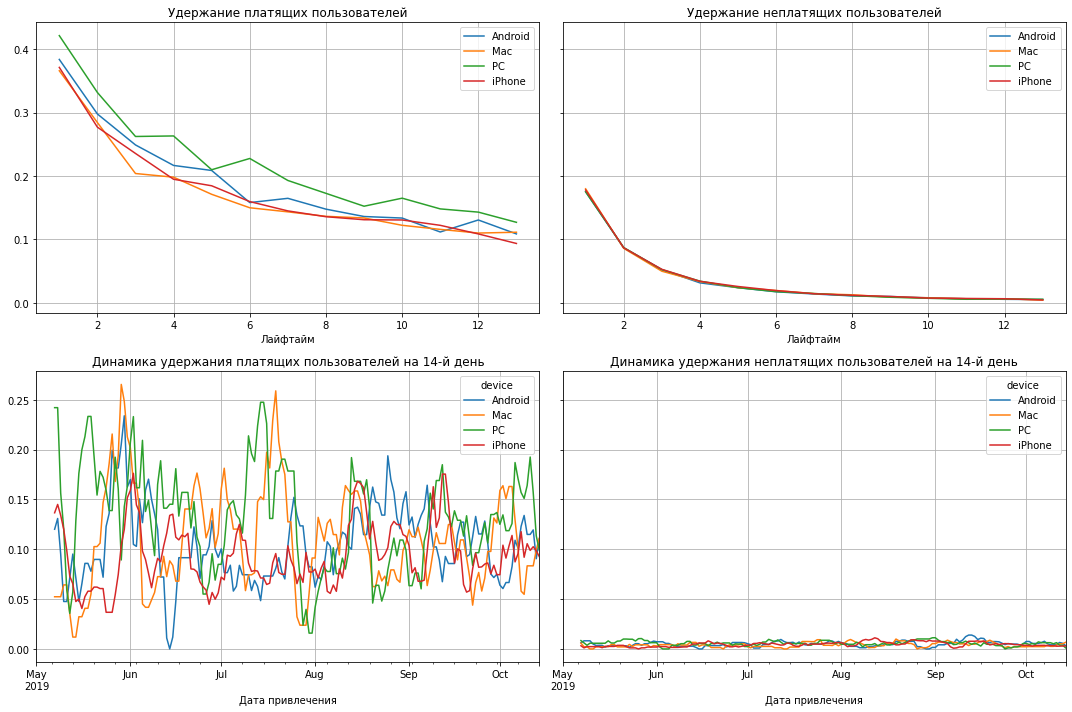

In [55]:
# расчет удержания для пользователей разных устройст
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'])
# график удержания и динамики удержания пользователей разных устройств
plot_retention(retention, retention_history, horizon_days, window=7)

Зато удерживаются чуть лучше именно пользователи PC. Но в целом разница с остальными не очень большая и удержание со временем падает. Пока предполагаю, что дело не в устройствах. Далее проверю данное предположение.

Что по каналам привлечения?:

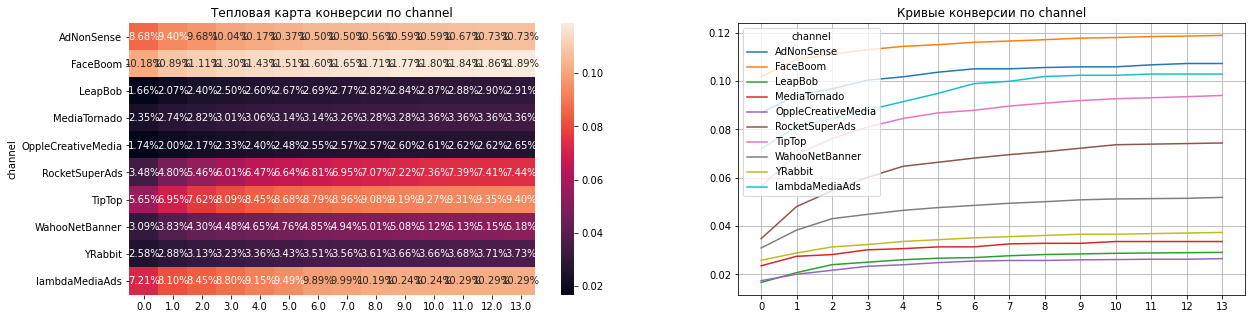

In [56]:
# получаю сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)
# построение тепловой карты и кривых конверсии по устройствам    
conversion_plot(conversion, 'channel')

Данные, полученные ранее о доле платящих клиентов, подтверджают и эти графики - FaceBoom отлично привлекает пользователей, и доля платящих у него тоже хорошая. А вот TipTop слабоват.

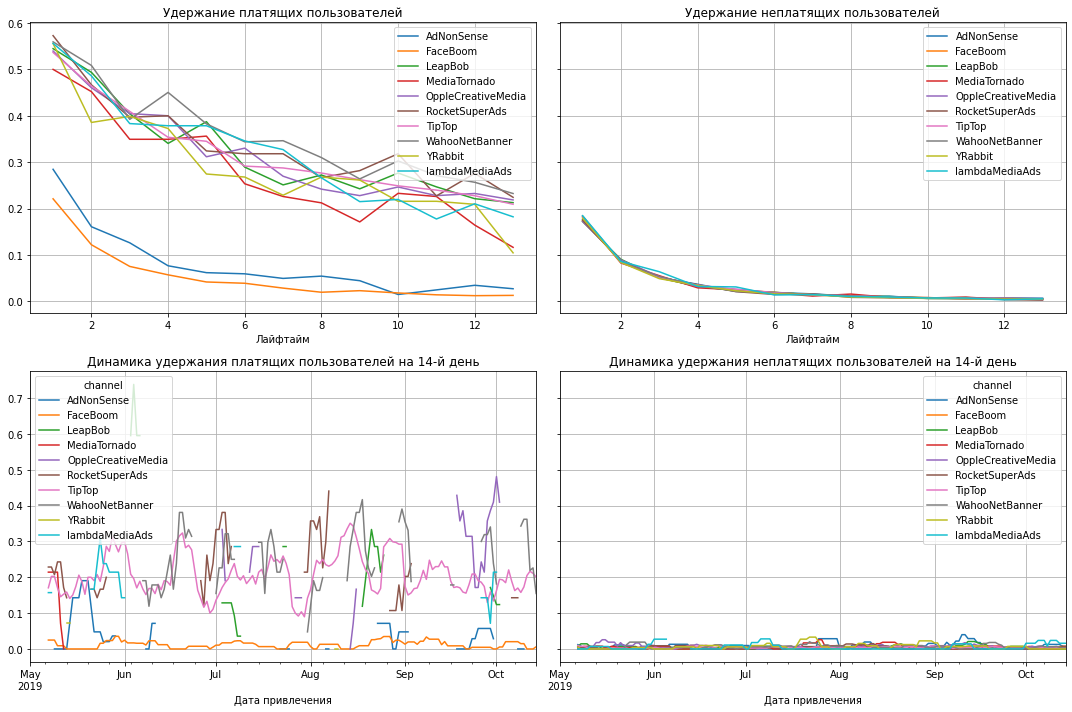

In [57]:
# расчет удержания для пользователей разных устройст
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'])
# график удержания и динамики удержания пользователей разных устройств
plot_retention(retention, retention_history, horizon_days, window=7)

Удержание FaceBoom просто ужасно, стабильно хуже всех, да и еще и очень-очень низкое. Аналогична и ситуация по каналу AdNonSense. Скорее всего именно в удержании кроется одна из проблем. Остальные не сильно друг от друга отличаются.

Еще одно из предположений почему бизнес показывает убытки, это неокупаемость компании по каналу TipTop (слишком большие затраты, которые не приносят "качественных" пользователей). Сделаю срез данных пользователей без этого канала и посмотрю, что произойдет с окупаемостью.

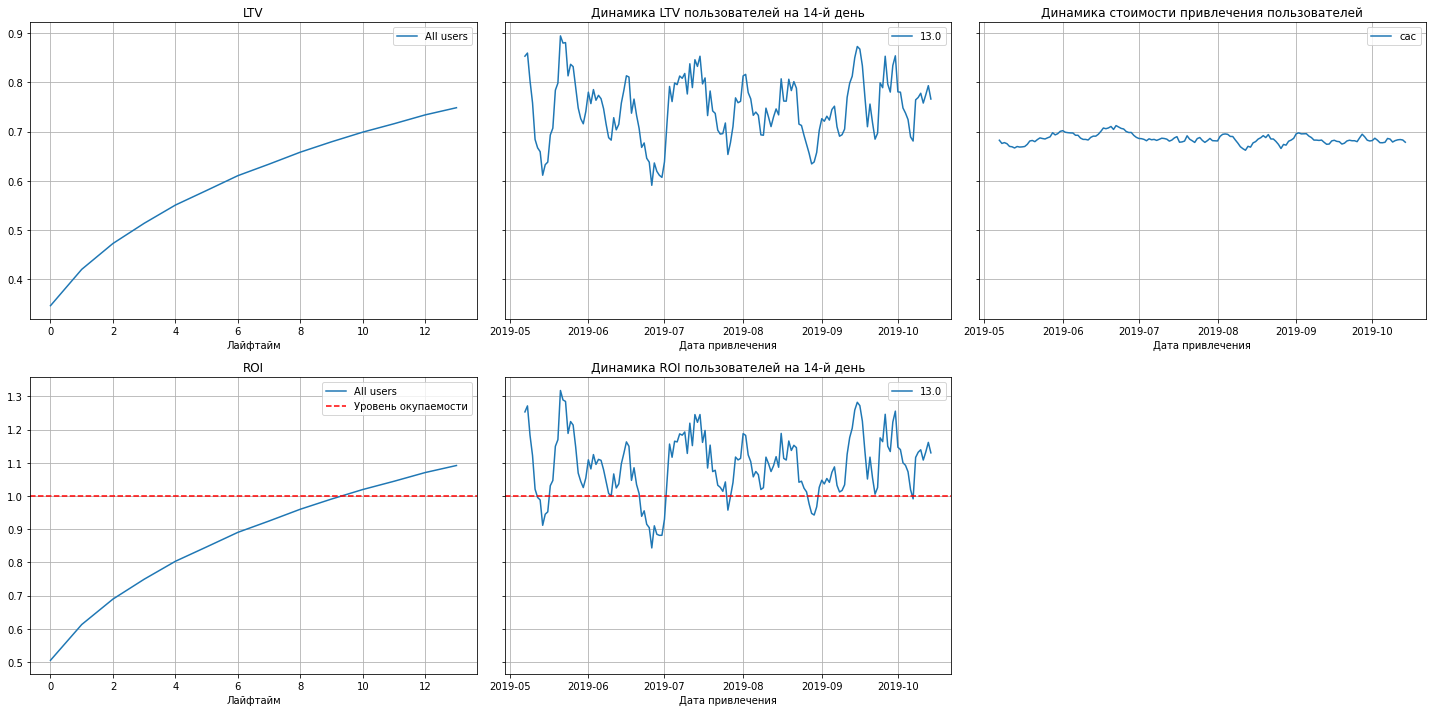

In [58]:
# новый датасет без пользователей канала TipTop
profiles_without_channel = profiles.query('channel!="TipTop"')

# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                               profiles_without_channel, orders, observation_date, horizon_days)
# графики LTV, ROI и их динамики на 14й день
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

На 9й день затраченые средства стали себя окупать и в динамике показатель ROI улучшился. CAC стал более стабилен. Уберу еще один самый дорогой канал FaceBoom:

In [59]:
# новый датасет без пользователей канала TipTop и FaceBoom
profiles_without_channel = profiles.query('channel!="TipTop" & channel!="FaceBoom"')

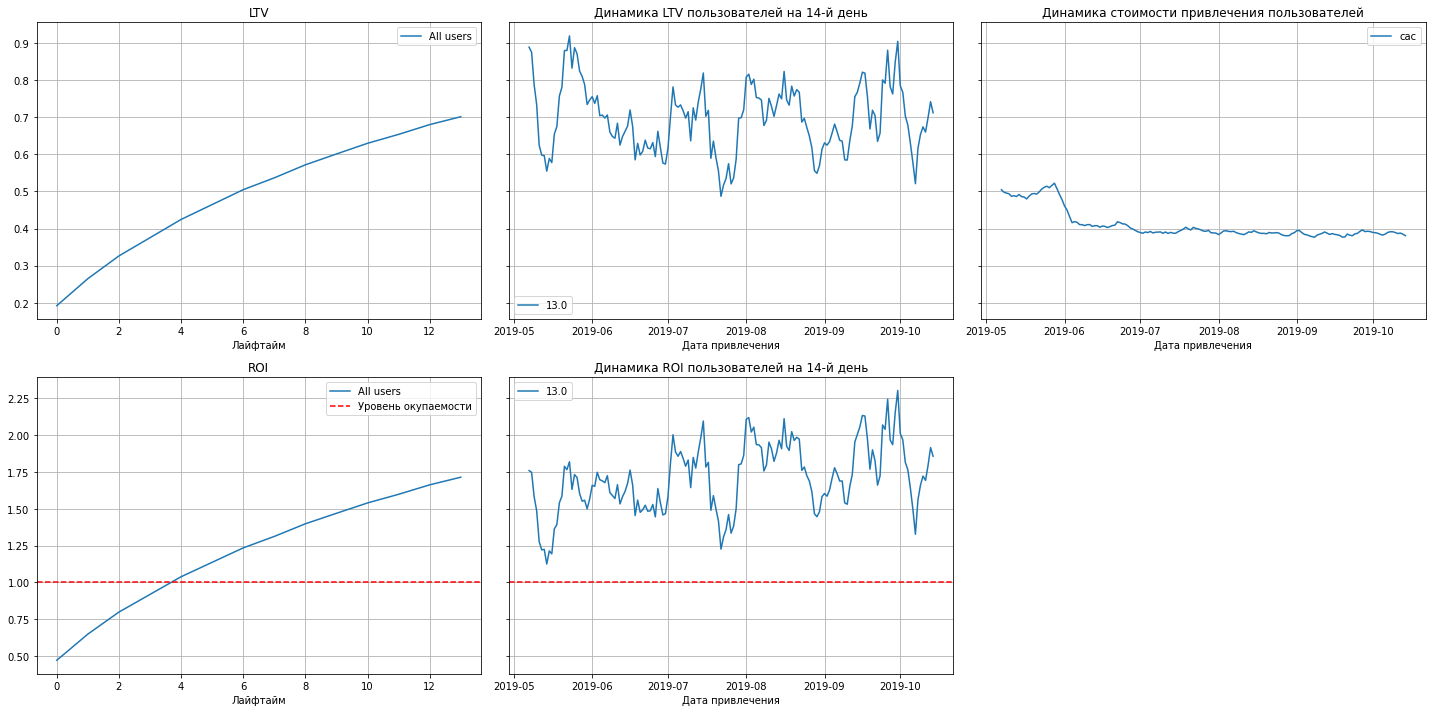

In [60]:
# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                                     profiles_without_channel, orders, observation_date, horizon_days)
# графики LTV, ROI и их динамики на 14й день
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


Ситуация с окупаемостью еще больше улучшилась. Дополнительно посмотрю, что стало происходить с окупаемостью в разбивке по каналам, странам и устройствам.

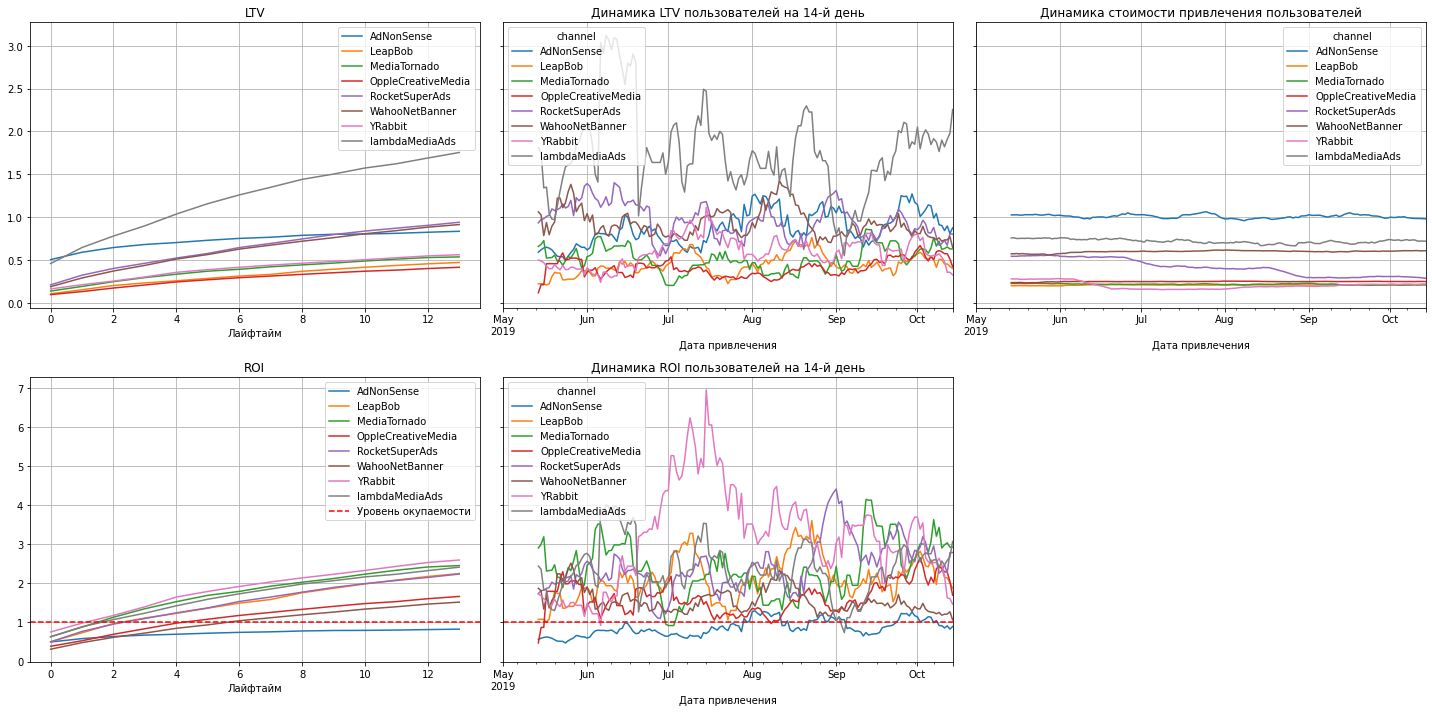

In [61]:
#окупаемость с разбивкой по источникам без канала TipTop и FaceBoom
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_channel, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 

Осталась проблема с окупаемость на канале AdNonSense - необходимо искать причину плохого удержания пользователей на этом канале.

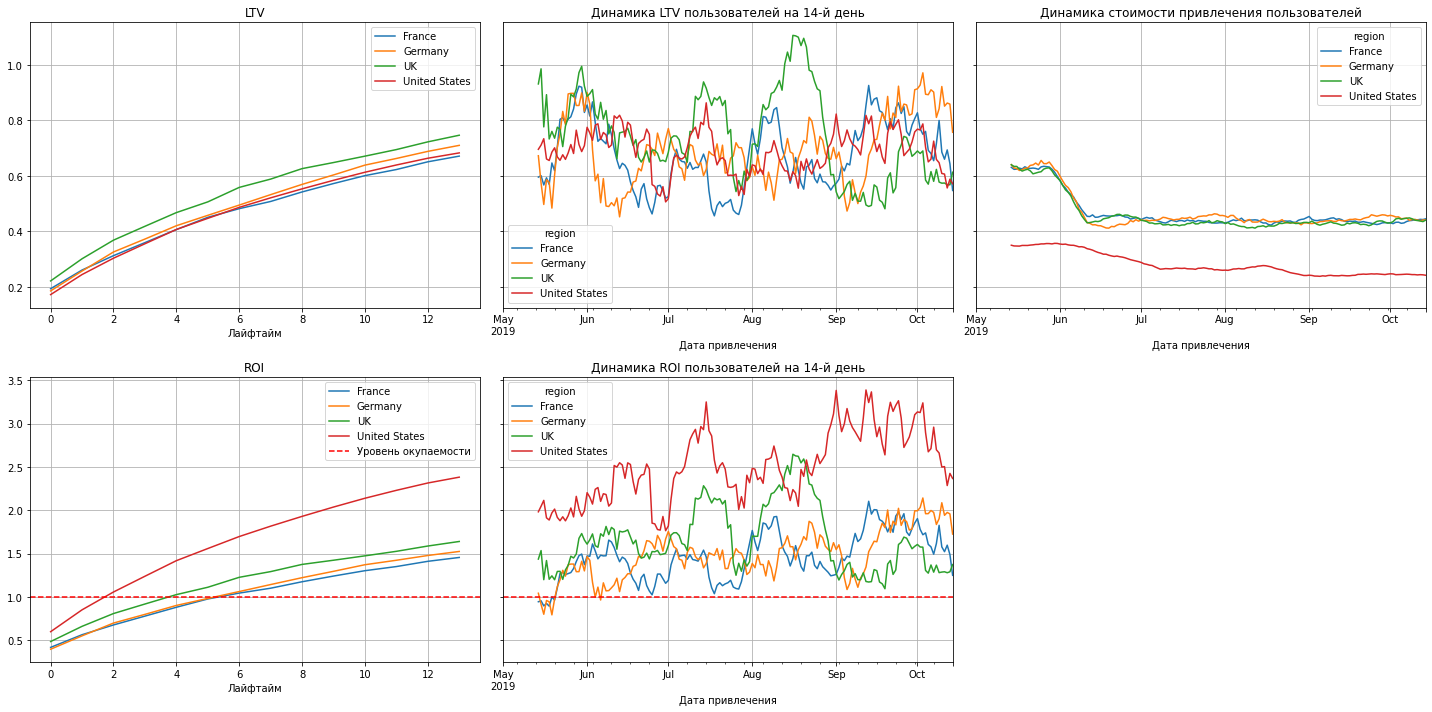

In [62]:
#окупаемость с разбивкой по странам без канала TipTop и FaceBoom
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_channel, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
             ) 

Все страны сразу вышли на окупаемость и динамика стоимости привлечения стала более стабильна, даже у тех же США.

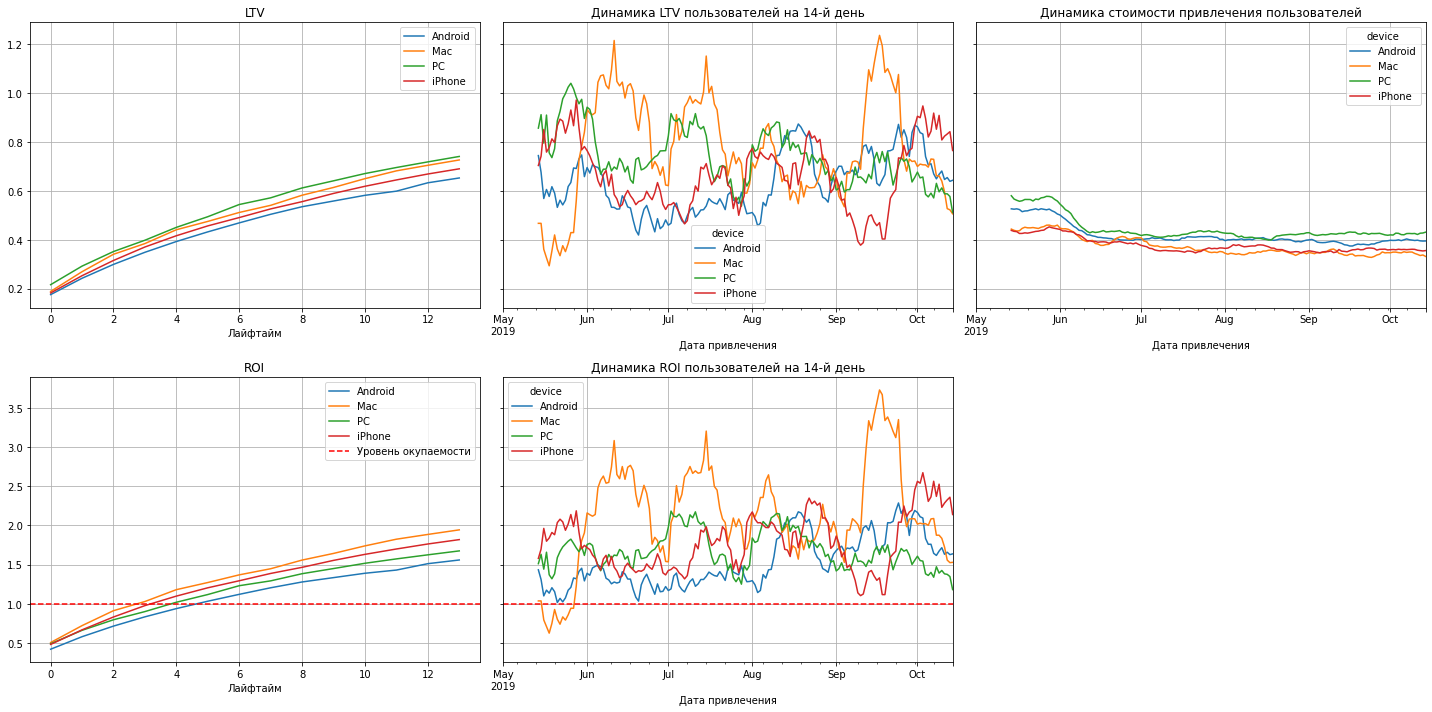

In [63]:
#окупаемость с разбивкой по устройствам без канала TipTop и FaceBoom
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_channel, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Улучшилась ситуация и по устройствам захода.

### Вывод

По полученным анализу окупаемости, показателям ROI, CAC, LTV можно уверенно сказать, что реклама не окупает себя совсем. 

Из графиков конверсии и удержания видно, что влияют на снижаемость окупаемости рекламы как плохое удержание пользователей США и приходящих с каналов FaceBoom и AdNonSense, так и слабое привлечение пользователей TipTop.

По используемым устройствам плохо конвертируются в платящих клиентов пользователи PC, но они лучше других удерживаюся, поэтому влияние используемого устройства тут крайне мало.

Предварительно могу предположить, что основная проблема в больших затратах на рекламу на каналах TipTop и FaceBoom, где пользователи или не приносят столько прибыли, чтобы покрыть данные расходы или их невозможно удержать. Вторая проблема в удержании пользователей США и приходящих с каналов AdNonSense.

##  Вывод и рекомендации

### Причины неэффективности привлечения пользователей

По выше полученным данным известно, что больше всего приложением пользуются посетители из США, их количество примерно в 5,5 раз превышает пользователей других стран, они же лучше других конвертируются в платящих пользователей, но при этом очень плохо удерживаются. Есть над чем подумать маркетологам. Так же возможно наличие технических проблем при переходе пользователя в платящего клиента, например проблема с оплатой приложения? Похожая ситуация и у тех, кто приходит с канала AdNonSense.

Каналы FaceBoom и TipTop тоже отлично привлекают пользователей, но у тех же клиентов с каналов AdNonSense и lambdaMediaAds доля платящих больше по сравнению с ними, хоть и меньшее количество посетителей. Возможно выбрана не та целевая аудитория на канале TipTop, которая неспособна принести достаточную прибыль компании. При этом на том же TipTop стоимость привлечения пользователя выше среднего приблизительно в 2,5 раза. Очень дорогой канал, только стоит ли он того?


### Рекомендации для отдела маркетинга для повышения эффективности

Слишком большие рекламные расходы на пользователей, которые не приносят столько денег, чтобы их покрыть, огромные вливания в TipTop (общая сумма расходов на маркетинг 105497, при этом больше половины затрачены на
TipTop - 54751.30 и немаленькая часть на FaceBoom -	32445.60), плюс к этому слабое удержание пользователей FaceBoom  - все это привело к тому что, бизнес компании не смог окупиться в этот период времени. 

Скорее всего маркетологов соблазнила большая популярность каналов TipTop и FaceBoom, но они не учли, что возможно интерес к данному приложению у пользователей данных каналов не настолько велик, чтобы они были готовы платить за данный продукт. И большая стоимость данных каналов, и как следствие большие затраты на них, принесли компании только убытки. Жаль, что в проекте не указано, на кого расчитато приложение Procrastinate Pro+, можно было бы проанализировать данный момент. Единственное, что известно, что все это пользователи США.  

Поэтому прежде чем планировать рекламный бюджет на такие дорогие каналы, стоит ориентироваться не только на их огромную пользовательскую аудиторию, а еще и на то, насколько приложение компании способно заинтересовать этих пользователей.

Необходимо проверить также удержание пользователей из США и тех, кто приходит с канала AdNonSense, у них большое количество потенциальных клиентов, они отлично конвертируютя, но что-то идет не так, возможно есть техническая проблема, которую необходимо решить. 

Для пользователей США стоит обратить внимание на канал RocketSuperAds, который к 10 дню привлечения приносит больше прибыли, чем плохо удерживаемый FaceBoom. И окупается RocketSuperAds, начиная со второго дня привлечения пользователей. 

Для пользователей Европы самую высокую прибыль и окупаемость показывает канал привлечения lambdaMediaAds, так же неплохую прибыль дает канал WahooNetBanner, и пусть не в первые дни, но он тоже окупается. Стоит обратить на них внимание. Еще стабильна прибыль у канала  AdNonSense, но есть проблема в окупаемости из-за плохого удержания. Если это решаемая техническая ошибка, то при ее устранении, скорее всего, пользователи с данного канала тоже покажут неплохие результаты. 